<a href="https://colab.research.google.com/github/paulowiz/machine_learning_mnist_dataset/blob/master/Machine_Learning_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()# X images and Y result 


x_train = tf.keras.utils.normalize(x_train, axis=1) #Normalize to help training convert pixels from 0-255 to 0-1  
x_test = tf.keras.utils.normalize(x_test, axis=1) #Normalize to help training convert pixels from 0-255 to 0-1  

#creating model 
model = tf.keras.models.Sequential() # Sequencial Model  (algoritm)
model.add(tf.keras.layers.Flatten()) # Add Layer that convert to a matriz  28x28 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # Relu Activate Layer 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Relu Activate Layer 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Output layer between 0 and 9  answers

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)  # Building a model with optimizer param and how many times the model will be trained ( 5 )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2604 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1032 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0717 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0398 - accuracy: 0.9868


In [59]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc) #How is the loss and accuracy of model 
print(len(x_train))#Count how many images in the train
print(len(x_test)) #Count how many images in the test 

313/313 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9758
0.07722525298595428 0.9757999777793884
60000
10000


In [60]:
print(x_train[0]) #Show the first image 28x28 as array

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

<function matplotlib.pyplot.show>

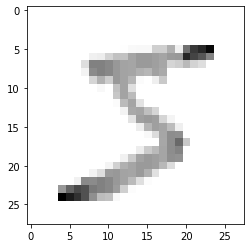

In [61]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary) # plot the first array in train and change color with cmap color map  cm.binary to black and white
plt.show

In [62]:
model.save('num_reader.model') #save model 

INFO:tensorflow:Assets written to: num_reader.model/assets


In [63]:
new_model = tf.keras.models.load_model('num_reader.model') #save a model in other variable  

In [64]:
predictions = new_model.predict(x_test) # get predictions(y_test) from images test in x_test

In [65]:
print(predictions) #The result with y_test in numbers without round 

[[1.6120869e-10 5.3251559e-09 2.0506003e-07 ... 9.9999928e-01
  9.0479659e-09 2.9012694e-08]
 [2.6632412e-12 6.6256130e-06 9.9998522e-01 ... 3.2837405e-10
  2.2307149e-09 2.1526475e-13]
 [1.4517718e-07 9.9854457e-01 1.5239691e-05 ... 2.0237146e-04
  1.1771930e-03 8.9187279e-07]
 ...
 [4.7112830e-10 2.2229422e-07 6.8432499e-10 ... 4.0234744e-07
  7.7841855e-07 4.9800117e-05]
 [9.6562459e-08 2.3904759e-08 3.3675798e-10 ... 5.0516498e-08
  5.8790434e-02 9.6522690e-08]
 [2.9830656e-07 2.0656155e-09 2.3798485e-10 ... 1.3083639e-11
  1.3665397e-08 2.8130303e-09]]


In [66]:
import numpy as np

print(np.argmax(predictions[0])) #round a value in the index 0

7


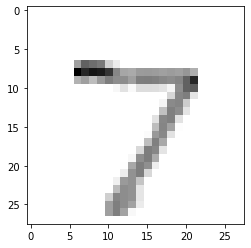

In [67]:
plt.imshow(x_test[0], cmap = plt.cm.binary) #plot the same index about x_test